In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.random.uniform(-3,3,size=100)
X=x.reshape(-1,1)
y=0.5*x**2+x+2+np.random.normal(0,1,100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures(degree=2)

In [7]:
poly.fit(X)
X2=poly.transform(X)

In [9]:
X2.shape

(100, 3)

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)

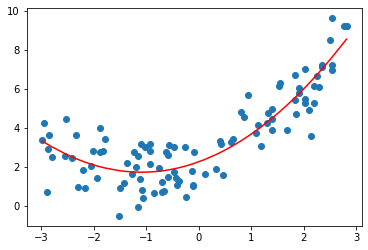

In [11]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')

In [12]:
lin_reg2.coef_

array([0.        , 0.98054209, 0.44830709])

In [13]:
lin_reg2.intercept_

2.2504630508547323

### 关于PolynomialFeatures

In [15]:
X = np.arange(1,11).reshape(-1,2)

In [16]:
X.shape

(5, 2)

In [17]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [18]:
poly=PolynomialFeatures(degree=2)

In [19]:
poly.fit(X)
X2=poly.transform(X)

In [20]:
X2.shape

(5, 6)

### Pipeline

In [21]:
x=np.random.uniform(-3,3,size=100)
X=x.reshape(-1,1)
y=0.5*x**2+x+2+np.random.normal(0,1,100)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [24]:
poly_reg.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [27]:
y_predict = poly_reg.predict(X)

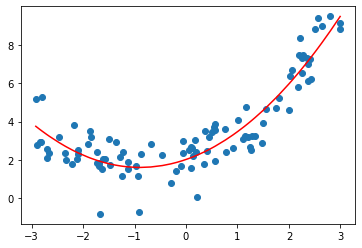

In [28]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')

### 过拟合和欠拟合

In [31]:
np.random.seed(666)
x=np.random.uniform(-3.0,3.0,size=100)
X=x.reshape(-1,1)
y=0.5*x**2+x+2+np.random.normal(0,1,size=100)

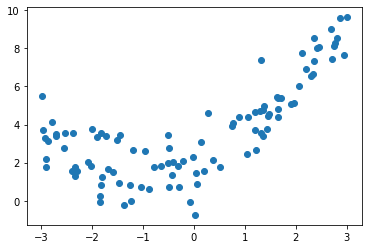

In [32]:
plt.scatter(x,y)

In [33]:
from sklearn.metrics import mean_squared_error


lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.4953707811865009

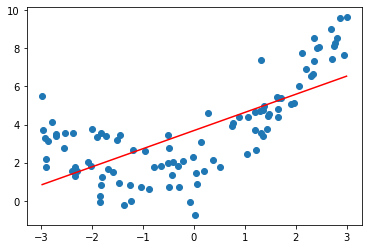

In [34]:
y_predict=lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')

In [35]:
y_predict = lin_reg.predict(X)
mean_squared_error(y,y_predict)

3.0750025765636577

### 使用多项式回归

In [45]:
def PolybomialRegression(degree):
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [46]:
poly2_reg = PolybomialRegression(2)
poly2_reg.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [47]:
y2_predict=poly2_reg.predict(X)
mean_squared_error(y,y2_predict)

1.0987392142417856

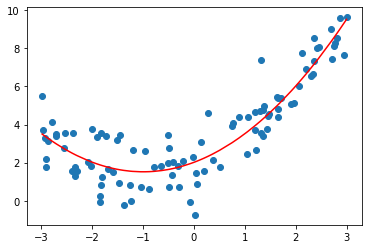

In [48]:
plt.scatter(x,y)
plt.plot(np.sort(x),y2_predict[np.argsort(x)],color='r')

In [49]:
poly10_reg = PolybomialRegression(degree=10)
poly10_reg.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [50]:
y10_predict=poly10_reg.predict(X)
mean_squared_error(y,y10_predict)

1.0508466763764164

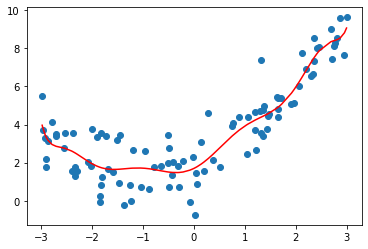

In [51]:
plt.scatter(x,y)
plt.plot(np.sort(x),y10_predict[np.argsort(x)],color='r')

### 学习曲线

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

In [55]:
X_train.shape

(75, 1)

In [61]:
train_score=[]
test_score=[]

for i in range(1,76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i],y_train[:i])
    
    y_train_predict =lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i],y_train_predict))
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test,y_test_predict))

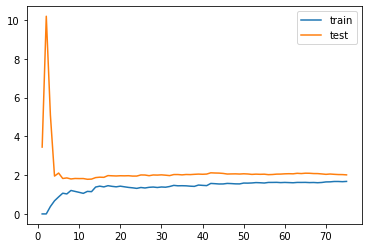

In [64]:
plt.plot([i for i in range(1,76)],np.sqrt(train_score),label='train')
plt.plot([i for i in range(1,76)],np.sqrt(test_score),label='test')
plt.legend()

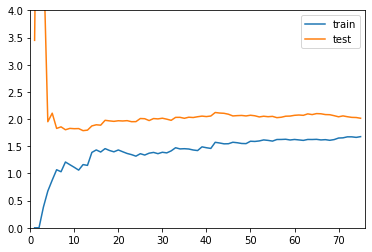

In [66]:
def plot_learning_curve(algo,X_train,X_test,y_train,y_test):
    train_score=[]
    test_score=[]

    for i in range(1,len(X_train)+1):
        algo.fit(X_train[:i],y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i],y_train_predict))
        
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test,y_test_predict))
        
    plt.plot([i for i in range(1,len(X_train)+1)],
             np.sqrt(train_score),label='train')
    plt.plot([i for i in range(1,len(X_train)+1)],
             np.sqrt(test_score),label='test')
    plt.legend()
    plt.axis([0,len(X_train)+1,0,4])
    
plot_learning_curve(LinearRegression(),X_train,X_test,y_train,y_test)

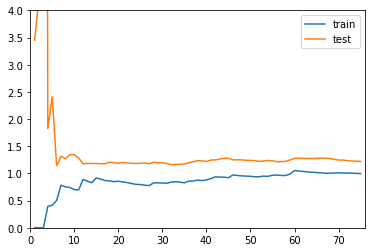

In [68]:
poly2_reg = PolybomialRegression(degree=2)
plot_learning_curve(poly2_reg,X_train,X_test,y_train,y_test)